In [ ]:
import cv2
import matplotlib.pyplot as plt
cv2.__version__

import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow 
from skimage import io
from PIL import Image 
import IPython.display as ipd
import random
from IPython.display import Audio
from scipy.io import wavfile
import scipy

!pip install librosa
import librosa
import librosa.display as dsp
!pip install mir_eval
!pip install pedalboard
from pedalboard import Pedalboard, Chorus, Reverb
from pedalboard.io import AudioFile
import base64
import subprocess
%matplotlib inline
#!pip install 'joblib==0.11' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mir_eval: filename=mir_eval-0.7-py3-none-any.whl size=100720 sha256=519ab897546a0f7154e5d7c19a04e3783cb2ae80e0db67c82cca9a75b3a25397
  Stored in directory: /root/.cache/pip/wheels/20/53/83/1d50d15a666140d53eda589db005f7cb53b739c7e54711f51f
Successfully built mir_eval
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 24.9 MB/s eta 0:00:00


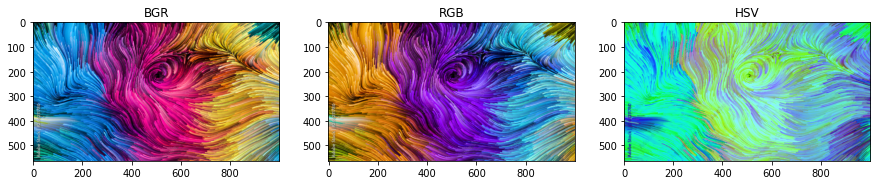

In [ ]:
urls = ["https://as2.ftcdn.net/v2/jpg/02/44/21/17/1000_F_244211780_VFoZhDiuxyWpnTalr0DFilyYqNokEoVZ.jpg"] 
for url in urls:
  ori_img = io.imread(url) 
  #bgr = cv2.imread('ori_img',cv2.IMREAD_COLOR)
  rgb = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)
  hsv= cv2.cvtColor(ori_img, cv2.COLOR_BGR2HSV)
  #final_frame = cv2.hconcat((ori_img,rgb))
  #final_frame1= cv2.hconcat(ori_img,hsv)

fig,axs= plt.subplots(1,3,figsize=(15,15))
names= ['BGR','RGB','HSV']
imgs=[ori_img,rgb,hsv]
i=0
for elem in imgs:
  axs[i].title.set_text(names[i])
  axs[i].imshow(elem)
  axs[i].grid(False)
  i+=1
plt.show()

In [ ]:
dimensions = ori_img.shape

height = ori_img.shape[0]
width = ori_img.shape[1] 
channels= ori_img.shape[2]
i=0 ; j=0
hues = [] 
for i in range(height):
    for j in range(width):
        hue = hsv[i][j][0] 
        hues.append(hue)

In [ ]:
pixels_df = pd.DataFrame(hues,columns=['hues'])
pixels_df

,hues
0,38
1,5
2,27
3,69
4,18
...,...
562995,19
562996,19
562997,19
562998,19


In [ ]:
scale_freqs = [220.00, 246.94 ,261.63, 293.66, 329.63, 349.23, 415.30] 
def hue2freq(h,scale_freqs):
    thresholds = [26 , 52 , 78 , 104,  128 , 154 , 180]
    note = scale_freqs[0]
    if (h <= thresholds[0]):
         note = scale_freqs[0]
    elif (h > thresholds[0]) & (h <= thresholds[1]):
        note = scale_freqs[1]
    elif (h > thresholds[1]) & (h <= thresholds[2]):
        note = scale_freqs[2]
    elif (h > thresholds[2]) & (h <= thresholds[3]):
        note = scale_freqs[3]
    elif (h > thresholds[3]) & (h <= thresholds[4]):    
        note = scale_freqs[4]
    elif (h > thresholds[4]) & (h <= thresholds[5]):
        note = scale_freqs[5]
    elif (h > thresholds[5]) & (h <= thresholds[6]):
        note = scale_freqs[6]
    else:
        note = scale_freqs[0]
    
    return note

In [ ]:
pixels_df['notes'] = pixels_df.apply(lambda row : hue2freq(row['hues'],scale_freqs), axis = 1)

In [ ]:
pixels_df

,hues,notes
0,38,246.94
1,5,220.00
2,27,246.94
3,69,261.63
4,18,220.00
...,...,...
562995,19,220.00
562996,19,220.00
562997,19,220.00
562998,19,220.00


In [ ]:
frequencies = pixels_df['notes'].to_numpy()

song = np.array([]) 
sr = 22050 #sample rate
T = 0.1    #second duration
t = np.linspace(0, T, int(T*sr), endpoint=False) #time variable
#nPixels = int(len(frequencies))#All pixels in image
nPixels = 60
for i in range(nPixels):  
    val = frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t) 
    song  = np.concatenate([song, note]) 
    
ipd.Audio(song, rate=sr)


In [ ]:
import librosa.display
from scipy.io.wavfile import write
song = np.array([],dtype=float) 
#octaves = np.array([1/2,1,2])
sr = 22050 
T = 0.1    
t = np.linspace(0, T, int(T*sr), endpoint=False) 

nPixels = 60
for i in range(nPixels):
    #octave = random.choice(octaves)
    val =  octave * random.choice(frequencies)
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
#write("pixels.wav", sr, song.astype(np.int16))
ipd.Audio(song, rate=22050) 
ipd.Audio("pixel.wav",rate=sr)

In [ ]:
song = np.array([]) 
octaves = np.array([0.5,1,2])
sr = 22050 
T = 0.1    
t = np.linspace(0, T, int(T*sr), endpoint=False) 

nPixels = 60
for i in range(nPixels):
    octave = random.choice(octaves)
    val =  octave * frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr)

In [ ]:
# BY ME
song = np.array([]) 
octaves = np.array([3/2,8/6])
sr = 22050 
T = 0.1    
t = np.linspace(0, T, int(T*sr), endpoint=False) 

nPixels = 60
for i in range(nPixels):
    octave = random.choice(octaves)
    val =  octave * frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t)
    song  = np.concatenate([song, note])
ipd.Audio(song, rate=sr) 

In [ ]:
def get_piano_notes():   
    # White key in Uppercase, black keys(sharps) in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 440 #Frequency of Note A4
    keys = np.array([x+str(y) for y in range(0,9) for x in octave])
    # Trim to standard 88 keys
    start = np.where(keys == 'A0')[0][0]
    end = np.where(keys == 'C8')[0][0]
    keys = keys[start:end+1]
    
    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 #stop
    return note_freqs

In [ ]:

note_freqs = get_piano_notes()

In [ ]:
#Define tones
scale_intervals = ['A','a','B','C','c','D','d','E','F','f','G','g']

In [ ]:

index = scale_intervals.index('C')

new_scale = scale_intervals[index:12] + scale_intervals[:index]
print(new_scale)

['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B']


In [ ]:
    #Choose scale
    if new_scale == 'AEOLIAN':
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif new_scale == 'BLUES':
        scale = [0, 2, 3, 4, 5, 7, 9, 10, 11]
    elif new_scale== 'PHYRIGIAN':
        scale = [0, 1, 3, 5, 7, 8, 10]
    elif new_scale == 'CHROMATIC':
        scale = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    elif new_scale == 'DORIAN':
        scale = [0, 2, 3, 5, 7, 9, 10]
    elif new_scale == 'HARMONIC_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 11]
    elif new_scale == 'LYDIAN':
        scale = [0, 2, 4, 6, 7, 9, 11]
    elif new_scale == 'MAJOR':
        scale = [0, 2, 4, 5, 7, 9, 11]
    elif new_scale == 'MELODIC_MINOR':
        scale = [0, 2, 3, 5, 7, 8, 9, 10, 11]
    elif new_scale == 'MINOR':    
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif new_scale == 'MIXOLYDIAN':     
        scale = [0, 2, 4, 5, 7, 9, 10]
    elif new_scale == 'NATURAL_MINOR':   
        scale = [0, 2, 3, 5, 7, 8, 10]
    elif new_scale == 'PENTATONIC':    
        scale = [0, 2, 4, 7, 9]
    else:
        print('Invalid scale name')

In [ ]:
#harmony dictionary (i.e. fundamental, perfect fifth, major third, octave)
#unison           = U0 #semitone         = ST
#major second     = M2 #minor third      = m3 
#major third      = M3 #perfect fourth   = P4
#diatonic tritone = DT #perfect fifth    = P5
#minor sixth      = m6 #major sixth      = M6
#minor seventh    = m7 #major seventh    = M7
#octave           = O8
harmony_select = {'U0' : 1,
                      'ST' : 16/15,
                      'M2' : 9/8,
                      'm3' : 6/5,
                      'M3' : 5/4,
                      'P4' : 4/3,
                      'DT' : 45/32,
                      'P5' : 3/2,
                      'm6': 8/5,
                      'M6': 5/3,
                      'm7': 9/5,
                      'M7': 15/8,
                      'O8': 2
                     }
    

In [ ]:
scale = [0, 2, 3, 4, 5, 7, 9, 10, 11]
nNotes = len(scale)

freqs = []
#harmony = []
#harmony_val = harmony_select['m3']
for i in range(nNotes):
    note = new_scale[scale[i]] + str(3)
    freqToAdd = note_freqs[note]
    freqs.append(freqToAdd)
    #harmony.append(harmony_val*freqToAdd)

In [ ]:
#ME
'''from scipy.io.wavfile import write
song = np.array([264600,2]) 
octaves = np.array([3/2,8/6])
sr = 22050 
T = 0.1    
t = np.linspace(0, T, int(T*sr), endpoint=False)
nPixels = 60
for i in range(nPixels):  
    val = frequencies[i]
    note  = 0.5*np.sin(2*np.pi*val*t) 
    song  = np.concatenate([song, note])
write("pixels.wav", sr,song.astype(np.int16))'''


In [ ]:
import librosa

In [ ]:
from music21 import midi
from music21 import *
 
pixels_df['notes'] = pixels_df.apply(lambda row : librosa.hz_to_note(row['frequencies']),axis = 1)  

pixels_df['midi_number'] = pixels_df.apply(lambda row : librosa.note_to_midi(row['notes']),axis = 1)    

In [ ]:
#Convert midi number column to a numpy array
midi_number = pixels_df['midi_number'].to_numpy()

degrees  = list(midi_number) 
track    = 0
channel  = 0
time     = 0   # In beats
duration = 1   # In beats
tempo    = 240  # In BPM
volume   = 100 # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1) # One track, defaults to format 1 (tempo track
                     # automatically created)
MyMIDI.addTempo(track,time, tempo)

for pitch in degrees:
    MyMIDI.addNote(track, channel, pitch, time, duration, volume)
    time = time + 1
with open("catterina.mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

In [ ]:
from pedalboard import Compressor, Gain, Phaser, Reverb,Distortion, LowShelfFilter, Delay, NoiseGate
from pedalboard import Limiter, LadderFilter

In [ ]:
'''with AudioFile("pixels.wav") as f:
  audio = f.read(f.frames)

from pedalboard import Reverb
reverb = Reverb(room_size=0.75, wet_level=0.5)
effected = reverb(audio, f.samplerate)'''

In [ ]:
'''with AudioFile("pixels.wav") as f:
  audio = f.read(f.frames)

board = Pedalboard([
  Distortion(gain_db=25),
  Delay(delay_seconds=0.6,feedback=0.5,mix =0.5),
  Reverb(room_size=0.75),
])
effected = board(audio,f.samplerate)'''

In [ ]:
'''with AudioFile("pixels.wav") as f:
  audio = f.read(f.frames)

board= Pedalboard([
    NoiseGate(threshold_db=-40, ratio=1.5, release_ms=250),
    Compressor(threshold_db=-16, ratio=2.5),
    LowShelfFilter(cutoff_frequency_hz=440, gain_db=10,q=1),
    Gain(gain_db=6),
])

effected = board(audio, f.sr)'''

In [ ]:
'''from pedalboard import load_plugin
with AudioFile("pixels.wav") as f:
  audio= f.read(f.frames)

plugin = load_plugin("CHOWCentaur.vst3")
plugin.show_editor()
print(plugin.gain)
plugin.gain=1.0
with_effects = plugin(audio,f.sr)'''


In [ ]:

                                         # PEDALBOARD DEMO


In [ ]:
y, sr = librosa.load("/content/pixels.wav", sr=44100)
Audio(y[:10 * sr], rate=sr)

/usr/local/lib/python3.8/dist-packages/IPython/lib/display.py:173: RuntimeWarning: invalid value encountered in true_divide
  scaled = np.int16(data / normalization_factor * 32767).tolist()


In [ ]:
import pedalboard
reverb = pedalboard.Reverb()
reverb

<pedalboard.Reverb room_size=0.5 damping=0.5 wet_level=0.33 dry_level=0.4 width=1 freeze_mode=0 at 0x968e380>

In [ ]:
reverb.wet_level = 1.0
effected = reverb(y, sample_rate=sr)

In [ ]:
Audio(effected[:20 * sr], rate=sr)

In [ ]:
from pedalboard import Compressor, Gain, Phaser, Reverb

board = pedalboard.Pedalboard([
    Compressor(ratio=10, threshold_db=-20),
    Gain(gain_db=20),
    Phaser(),
    Reverb()
])

board


<Pedalboard with 4 plugins: [<pedalboard.Compressor threshold_db=-20 ratio=10 attack_ms=1 release_ms=100 at 0x3919c80>, <pedalboard.Gain gain_db=20 at 0x9508a00>, <pedalboard.Phaser rate_hz=1 depth=0.5 centre_frequency_hz=1300 feedback=0 mix=0.5 at 0x95a6000>, <pedalboard.Reverb room_size=0.5 damping=0.5 wet_level=0.33 dry_level=0.4 width=1 freeze_mode=0 at 0x968f180>]>

In [ ]:
Audio(effected[:20 * sr], rate=sr)

In [ ]:
from pedalboard import Gain, Limiter, LadderFilter, Phaser, Reverb

board = pedalboard.Pedalboard([
    Phaser(rate_hz=1.0, depth=1.0, feedback=0.25, mix=1.0),
    LadderFilter(mode=LadderFilter.HPF12, cutoff_hz=329.63, resonance=0.75),
    Gain(-5),
    Reverb(room_size=0.75, wet_level=0.5),
    Limiter(),
])

for plugin in board:
    print(plugin)

<pedalboard.Phaser rate_hz=1 depth=1 centre_frequency_hz=1300 feedback=0.25 mix=1 at 0x95a7e00>
<pedalboard.LadderFilter mode=pedalboard.LadderFilter.HPF12 cutoff_hz=329.63 resonance=0.75 drive=1 at 0x6401d40>
<pedalboard.Gain gain_db=-5 at 0x9507400>
<pedalboard.Reverb room_size=0.75 damping=0.5 wet_level=0.5 dry_level=0.4 width=1 freeze_mode=0 at 0x968fc00>
<pedalboard.Limiter threshold_db=-10 release_ms=100 at 0x7e91e40>


In [ ]:
Audio(effected[:20 * sr], rate=sr)